## Data Wrangling
Problem Statement: Data Wrangling on Real Estate Market
Dataset: "RealEstate_Prices.csv"
Description: The dataset contains information about housing prices in a specific real estate 
market. It includes various attributes such as property characteristics, location, sale prices, 
and other relevant features. The goal is to perform data wrangling to gain insights into the 
factors influencing housing prices and prepare the dataset for further analysis or modeling.
Tasks to Perform:
1. Import the "RealEstate_Prices.csv" dataset. Clean column names by removing spaces, 
special characters, or renaming them for clarity.
2. Handle missing values in the dataset, deciding on an appropriate strategy (e.g., 
imputation or removal).
3. Perform data merging if additional datasets with relevant information are available 
(e.g., neighborhood demographics or nearby amenities).
4. Filter and subset the data based on specific criteria, such as a particular time period, 
property type, or location.
5. Handle categorical variables by encoding them appropriately (e.g., one-hot encoding or 
label encoding) for further analysis.
6. Aggregate the data to calculate summary statistics or derived metrics such as average 
sale prices by neighborhood or property type.
7. Identify and handle outliers or extreme values in the data that may affect the analysis 
or modeling process.

In [2]:
# Step 1: Import the dataset
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Bengaluru_House_Data - Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df.columns= df.columns.str.replace('[A-Za-z0-9','_').str.lower()
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df['bath'] = df['bath'].fillna(df['bath'].mean())
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath               0
balcony          609
price              0
dtype: int64

In [8]:
df['location']= df['location'].fillna(df['location'].mode().iloc[0])
df['society']= df['society'].fillna(df['society'].mode().iloc[0])
df['balcony']= df['balcony'].fillna(df['balcony'].mode().iloc[0])
df['size']= df['size'].fillna(df['size'].mode().iloc[0])
df.isnull().sum()


area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [9]:
# Step 3: Perform Data Merging (if additional datasets are available)
# Assuming there's an additional dataset with neighborhood demographics, for example:
# neighborhood_df = pd.read_csv('neighborhood_data.csv')
# df = df.merge(neighborhood_df, on='neighborhood_column', how='left')


In [43]:
# Step 4: Filter and Subset the Data
df_filtered = df[(df['price'] >= 30) & (df['location'] == 'Chikka Tirupathi')]
df_filtered.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1,Plot Area,Ready To Move,Chikka Tirupathi,19,Theanmp,2600,5.0,3.0,120.00
1265,Plot Area,Ready To Move,Chikka Tirupathi,19,Theanmp,2325,4.0,1.0,120.00
1535,Built-up Area,Ready To Move,Chikka Tirupathi,22,Theanmp,3356,5.0,2.0,105.00
1568,Plot Area,Ready To Move,Chikka Tirupathi,17,FiriaVi,1808,4.0,2.0,80.27
2675,Plot Area,18-May,Chikka Tirupathi,17,Theanmp,3297,3.0,1.0,135.00


In [11]:
# Step 5: Handle categorical variables (e.g., convert 'location' column to numerical values using label encoding)
from sklearn.preprocessing import LabelEncoder

In [12]:
label_encoder = LabelEncoder()

In [13]:
# Assuming 'location' is a categorical column
df['size'] = label_encoder.fit_transform(df['size'])
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,13,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,19,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,16,GrrvaGr,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,16,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,13,GrrvaGr,1200,2.0,1.0,51.00


In [14]:
# Step 6: Aggregate the data (e.g., average sale price by location)
average_price_by_location = df.groupby('location')['price'].mean()

# Display the aggregated data
average_price_by_location


location
1 Annasandrapalya                                  150.00
1 Giri Nagar                                       360.00
1 Immadihalli                                      150.00
1 Ramamurthy Nagar                                 170.00
12th cross srinivas nagar banshankari 3rd stage    200.00
                                                    ...  
t.c palya                                          160.00
tc.palya                                            60.75
vinayakanagar                                      200.00
white field,kadugodi                               275.00
whitefiled                                          32.73
Name: price, Length: 1294, dtype: float64

In [15]:
# Step 7: Identify outliers using IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1


In [16]:
# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [44]:
# Filter out outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [45]:
# Display the data after removing outliers
df_no_outliers.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,13,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,19,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,16,GrrvaGr,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,16,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,13,GrrvaGr,1200,2.0,1.0,51.00


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

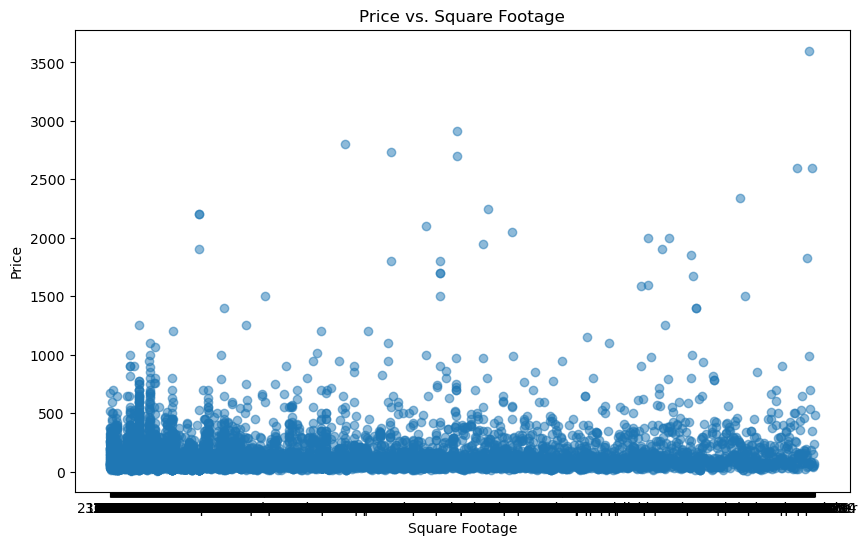

In [47]:
# Scatter plot of price vs. square footage
plt.figure(figsize=(10, 6))
plt.scatter(df['total_sqft'], df['price'], alpha=0.5)
plt.title('Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()


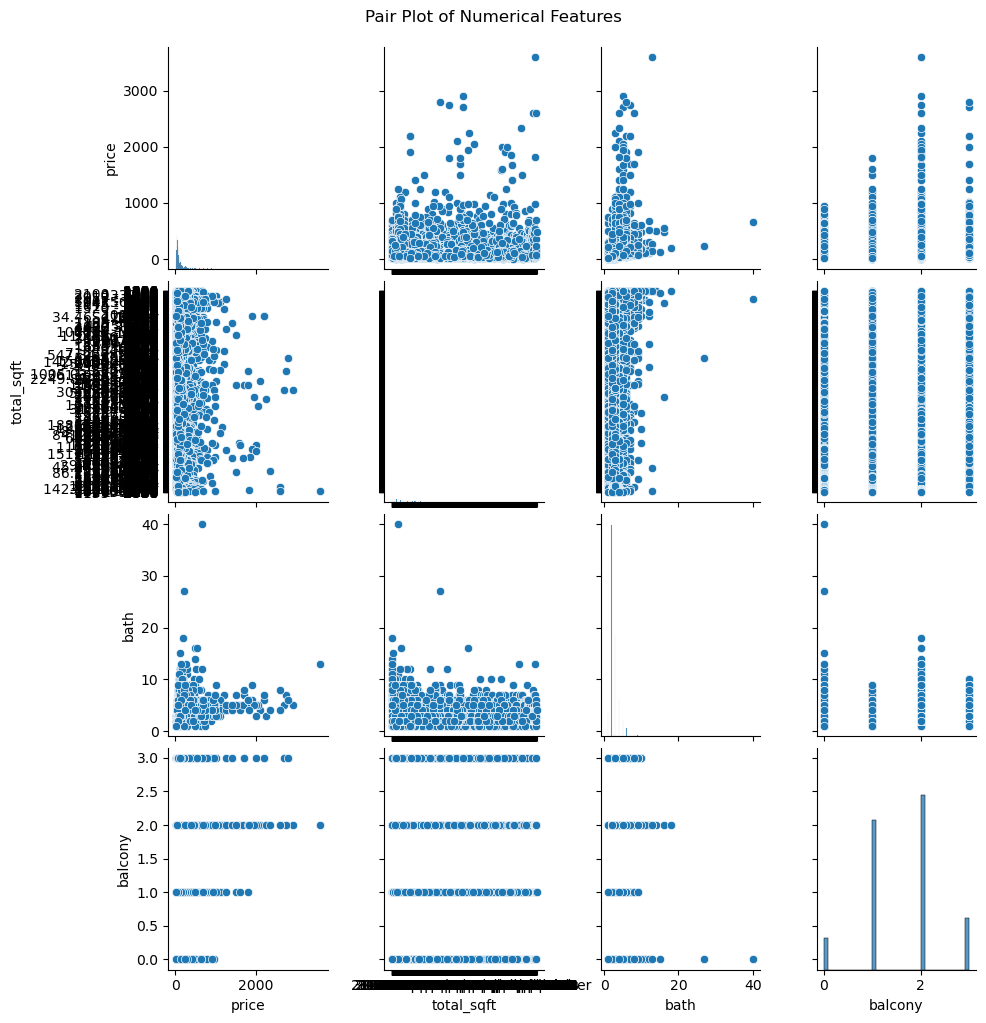

In [21]:
# Pair plot of numerical features
sns.pairplot(df, vars=['price', 'total_sqft', 'bath', 'balcony'])  # Replace with relevant column names
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()
